## Problem Statement: Concrete Strength Prediction
### Objective


To predict the concrete strength using the data available in file concrete_data.xls. Apply feature engineering and model tuning to obtain 80% to 95% of R2score.

### Import all necessary libraries and load data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# For Standard numpy and Pandas Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
sns.set(color_codes=True) # adds a nice background to the graphs       
import pandas_profiling
from scipy import stats

# For breaking the X and y dataframes into training set and test set.
from sklearn.model_selection import train_test_split

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# For Polynomial features - quatdratic and higher features
from sklearn.preprocessing import PolynomialFeatures

# For Model Performance Testing using cross validation methods
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# For Ensemble Models
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor  



# plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:95% !important; }</style>"))

In [3]:
df = pd.read_csv('concrete.csv')

## Exploratory Data Quality Report 

### General Description of the DataFrame

In [4]:
df.head() #View the first 5 rows of the dataframe

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.30,212.00,0.00,203.50,0.00,971.80,748.50,28,29.89
1,168.90,42.20,124.30,158.30,10.80,"1,080.80",796.20,14,23.51
2,250.00,0.00,95.70,187.40,5.50,956.90,861.20,28,29.22
3,266.00,114.00,0.00,228.00,0.00,932.00,670.00,28,45.85
4,154.80,183.40,0.00,193.30,9.10,"1,047.40",696.70,28,18.29


In [5]:
# Get information about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


We have 9 numerical columns and all 1030 rows have an entry. Hence there are no null values.

In [6]:
# confirm the number of rows and columns in the dataframe
df.shape

(1030, 9)

## Univariate Analysis (10 marks)

In [7]:
#Descriptive Statistics of dataframe using the describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,"1,030.00",281.17,104.51,102.00,192.38,272.90,350.00,540.00
slag,"1,030.00",73.90,86.28,0.00,0.00,22.00,142.95,359.40
ash,"1,030.00",54.19,64.00,0.00,0.00,0.00,118.30,200.10
water,"1,030.00",181.57,21.35,121.80,164.90,185.00,192.00,247.00
superplastic,"1,030.00",6.20,5.97,0.00,0.00,6.40,10.20,32.20
coarseagg,"1,030.00",972.92,77.75,801.00,932.00,968.00,"1,029.40","1,145.00"
fineagg,"1,030.00",773.58,80.18,594.00,730.95,779.50,824.00,992.60
age,"1,030.00",45.66,63.17,1.00,7.00,28.00,56.00,365.00
strength,"1,030.00",35.82,16.71,2.33,23.71,34.45,46.14,82.60


The above shows the Descriptive Statistics of the 9 numerical columns in the dataframe

### Numerical Attribute Distributions

Text(0.5, 1.0, 'Distribution Plot for Cement')

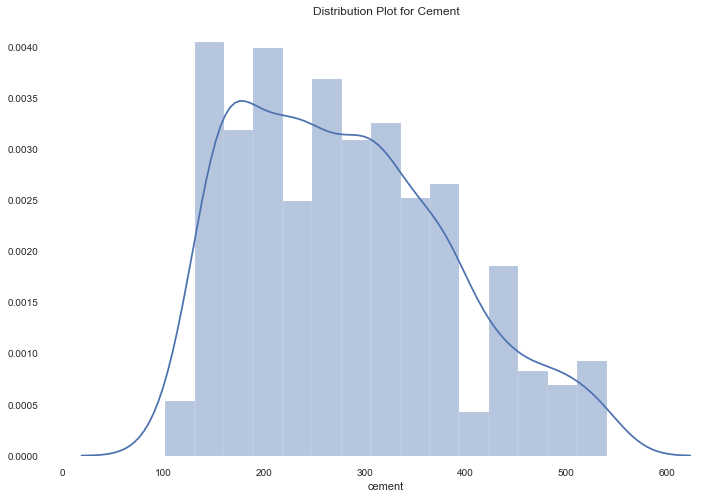

In [8]:
# Distribution of the Cement column in dataframe
plt.figure(figsize=(12,8))
sns.distplot(df['cement'])
plt.title ('Distribution Plot for Cement')

    

In [9]:
df['cement'].value_counts(normalize = True)

425.00   0.02
362.60   0.02
251.40   0.01
446.00   0.01
310.00   0.01
         ... 
312.90   0.00
261.90   0.00
325.60   0.00
143.80   0.00
145.40   0.00
Name: cement, Length: 278, dtype: float64

Text(0.5, 1.0, 'Distribution Plot for Slag')

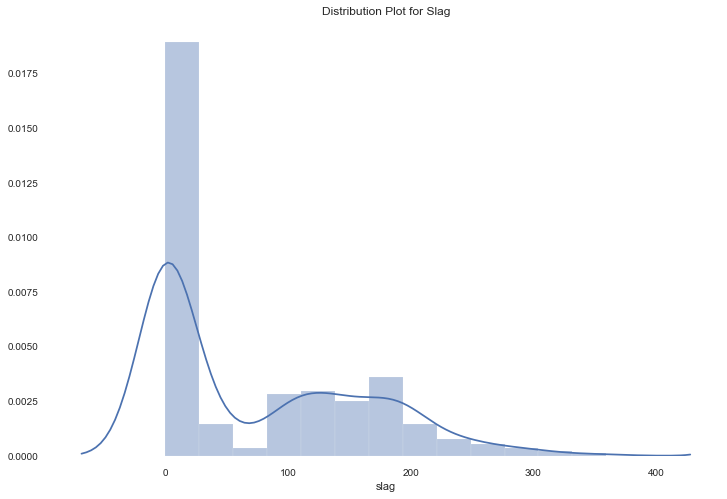

In [10]:
# Distribution of the Slag column in dataframe
plt.figure(figsize=(12,8))
sns.distplot(df['slag'])
plt.title ('Distribution Plot for Slag')


In [11]:
df['slag'].value_counts(normalize = True)

0.00     0.46
189.00   0.03
106.30   0.02
24.00    0.01
20.00    0.01
         ... 
161.00   0.00
160.50   0.00
129.00   0.00
100.60   0.00
209.00   0.00
Name: slag, Length: 185, dtype: float64

Text(0.5, 1.0, 'Distribution Plot for Ash')

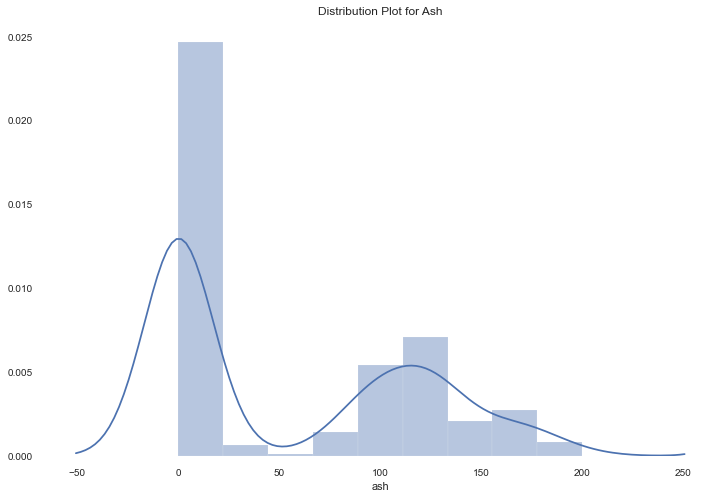

In [12]:
# Distribution of the Ash column in dataframe
plt.figure(figsize=(12,8))
sns.distplot(df['ash'])
plt.title ('Distribution Plot for Ash')


In [13]:
df['ash'].value_counts(normalize = True)

0.00     0.55
118.30   0.02
141.00   0.02
24.50    0.01
79.00    0.01
         ... 
119.00   0.00
134.00   0.00
95.00    0.00
130.00   0.00
129.70   0.00
Name: ash, Length: 156, dtype: float64

Text(0.5, 1.0, 'Distribution Plot for Water')

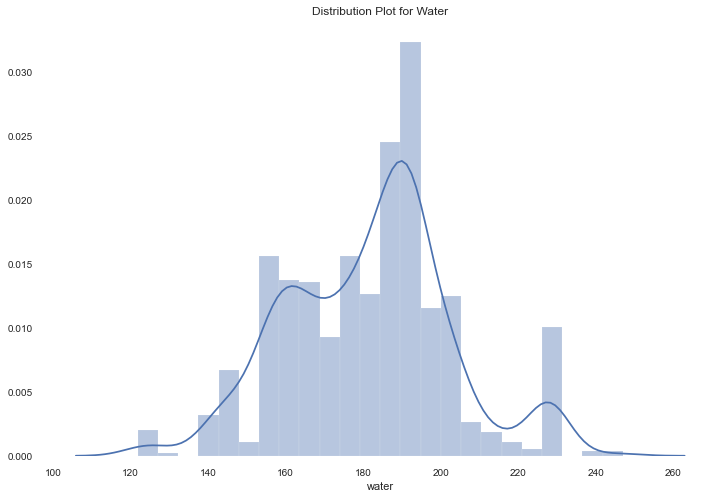

In [14]:
# Distribution of the Water column in dataframe
plt.figure(figsize=(12,8))
sns.distplot(df['water'])
plt.title ('Distribution Plot for Water')


In [15]:
df['water'].value_counts(normalize = True)

192.00   0.11
228.00   0.05
185.70   0.04
203.50   0.03
186.00   0.03
         ... 
165.00   0.00
237.00   0.00
166.70   0.00
191.30   0.00
184.40   0.00
Name: water, Length: 195, dtype: float64

Text(0.5, 1.0, 'Distribution Plot for Superplastic')

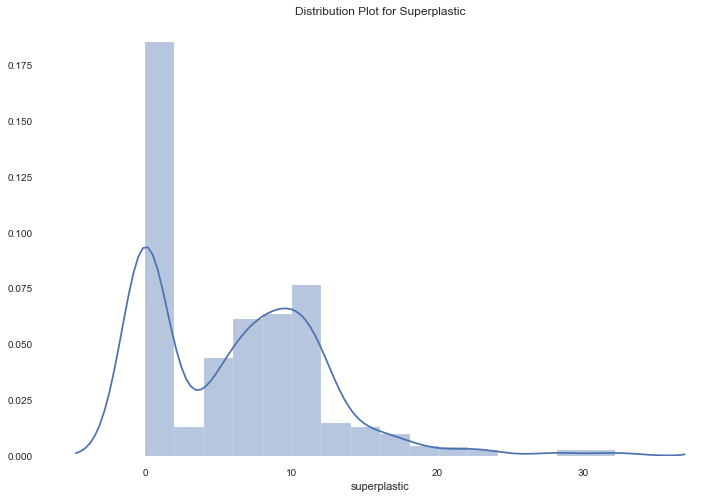

In [16]:
# Distribution of the superplastic column in dataframe
plt.figure(figsize=(12,8))
sns.distplot(df['superplastic'])
plt.title ('Distribution Plot for Superplastic')


In [17]:
df['superplastic'].value_counts(normalize = True)

0.00    0.37
11.60   0.04
8.00    0.03
7.00    0.02
6.00    0.02
        ... 
2.20    0.00
11.50   0.00
6.30    0.00
10.50   0.00
9.80    0.00
Name: superplastic, Length: 111, dtype: float64

Text(0.5, 1.0, 'Distribution Plot for Coarse Aggregate')

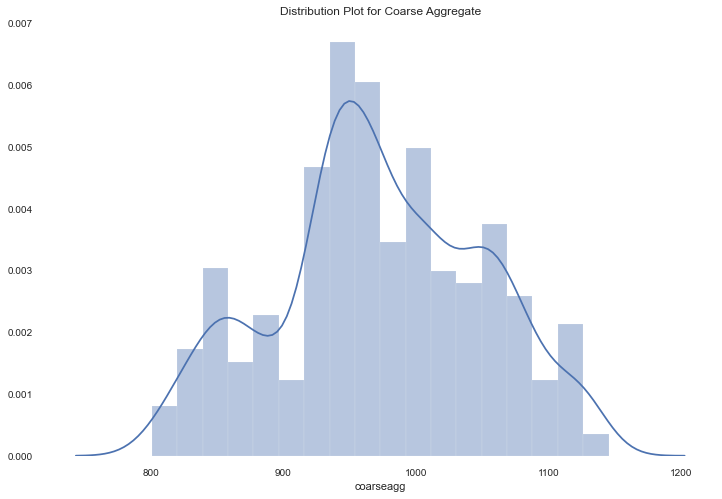

In [18]:
# Distribution of the coarse aggregate column in dataframe
plt.figure(figsize=(12,8))
sns.distplot(df['coarseagg'])
plt.title ('Distribution Plot for Coarse Aggregate')


In [19]:
df['coarseagg'].value_counts(normalize = True)

932.00     0.06
852.10     0.04
944.70     0.03
968.00     0.03
1,125.00   0.02
           ... 
909.70     0.00
925.30     0.00
845.00     0.00
868.60     0.00
923.20     0.00
Name: coarseagg, Length: 284, dtype: float64

Text(0.5, 1.0, 'Distribution Plot for Fine Aggregate')

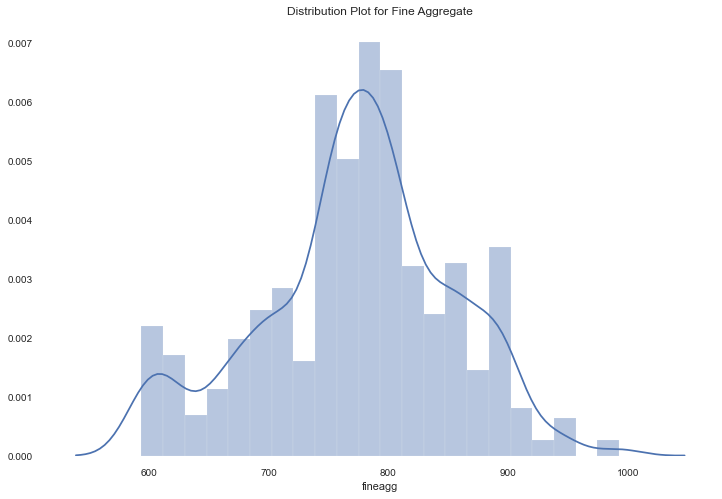

In [20]:
# Distribution of the Fine Aggregate column in dataframe
plt.figure(figsize=(12,8))
sns.distplot(df['fineagg'])
plt.title ('Distribution Plot for Fine Aggregate')


In [21]:
df['fineagg'].value_counts(normalize = True)

594.00   0.03
755.80   0.03
670.00   0.02
613.00   0.02
801.00   0.02
         ... 
792.50   0.00
762.90   0.00
674.80   0.00
658.00   0.00
762.20   0.00
Name: fineagg, Length: 302, dtype: float64

Text(0.5, 1.0, 'Distribution Plot for Age')

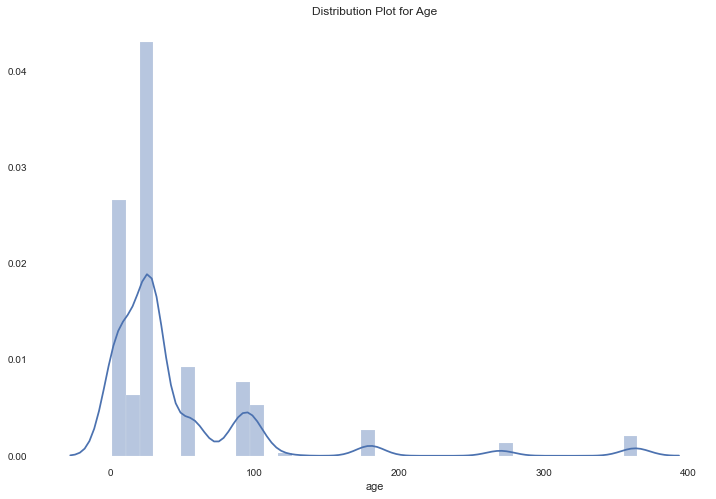

In [22]:
# Distribution of the Age column in dataframe
plt.figure(figsize=(12,8))
sns.distplot(df['age'])
plt.title ('Distribution Plot for Age')


In [23]:
df['age'].value_counts(normalize = True)

28    0.41
3     0.13
7     0.12
56    0.09
14    0.06
90    0.05
100   0.05
180   0.03
91    0.02
365   0.01
270   0.01
360   0.01
120   0.00
1     0.00
Name: age, dtype: float64

Text(0.5, 1.0, 'Distribution Plot for Strength')

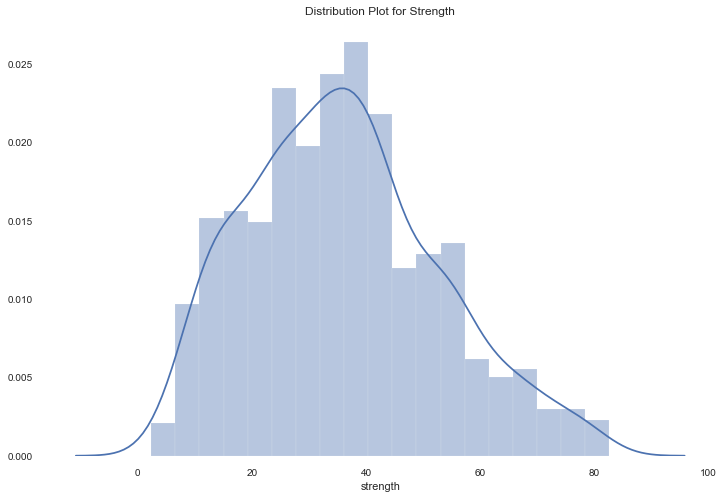

In [24]:
# Distribution of the Strength column in dataframe
plt.figure(figsize=(12,8))
sns.distplot(df['strength'])
plt.title ('Distribution Plot for Strength')


In [25]:
df['strength'].value_counts(normalize = True)

33.40   0.01
79.30   0.00
41.05   0.00
71.30   0.00
35.30   0.00
        ... 
61.23   0.00
26.31   0.00
38.63   0.00
47.74   0.00
15.75   0.00
Name: strength, Length: 845, dtype: float64

<b> Observations on Numerical Attribute Distribution:
    1. The target column (Strength) is close to a normal distribution and it is slightly skewed.
    
    2. All the features (predictor variables) have distributions that are not normal. 

### Missing Values in Dataframe

In [26]:
# Check the Movie info data for missing values:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [27]:
df.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

There are no missing values (as null or NA).

### Outliers in Dataframe

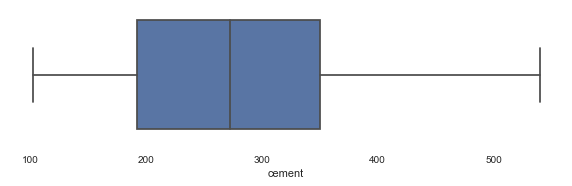

cement: 0 data points are outliers
0% of cement data are no where near the quartiles


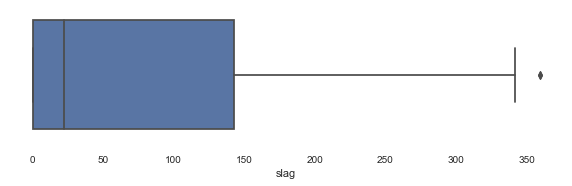

slag: 2 data points are outliers
0% of slag data are no where near the quartiles


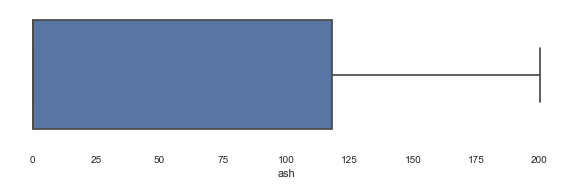

ash: 0 data points are outliers
0% of ash data are no where near the quartiles


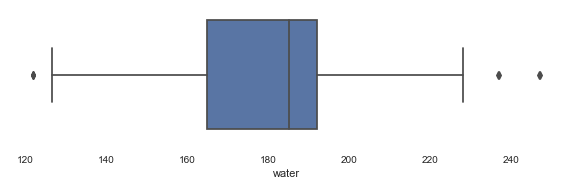

water: 9 data points are outliers
1% of water data are no where near the quartiles


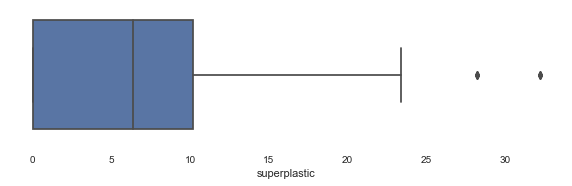

superplastic: 10 data points are outliers
1% of superplastic data are no where near the quartiles


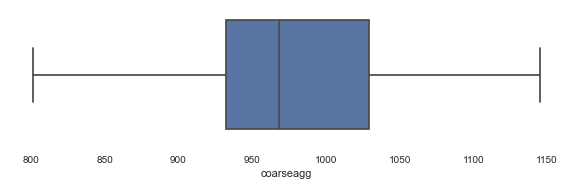

coarseagg: 0 data points are outliers
0% of coarseagg data are no where near the quartiles


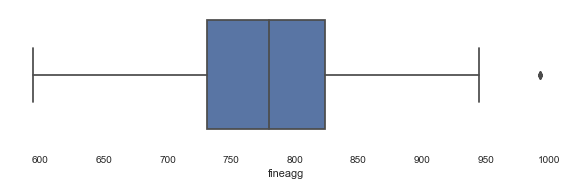

fineagg: 5 data points are outliers
0% of fineagg data are no where near the quartiles


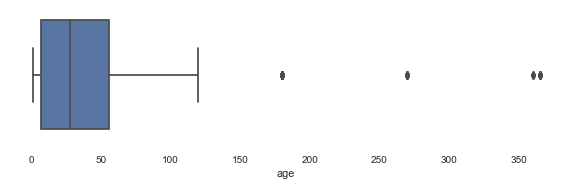

age: 59 data points are outliers
6% of age data are no where near the quartiles


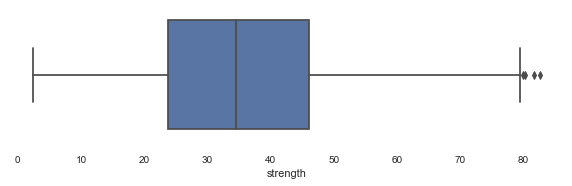

strength: 4 data points are outliers
0% of strength data are no where near the quartiles


In [28]:
# Outlier Analysis of Numerical variables using Box Plot
for i in list(df.columns):   
    plt.figure(figsize=(10,2.5))
    sns.boxplot(x=df[i])
    plt.show()
    print(str(i) +': ' + str (df[(df[i]<(df[i].quantile(0.25)-(1.5* (df[i].quantile(0.75)-df[i].quantile(0.25))))) | (df[i]>(df[i].quantile(0.75)+(1.5* (df[i].quantile(0.75)-df[i].quantile(0.25)))))].shape[0]) +' data points are outliers')
    print(str(round((df[(df[i]<(df[i].quantile(0.25)-(1.5* (df[i].quantile(0.75)-df[i].quantile(0.25))))) | (df[i]>(df[i].quantile(0.75)+(1.5* (df[i].quantile(0.75)-df[i].quantile(0.25)))))].shape[0]/df.shape[0])*100))+'% of '+str(i)+ ' data are no where near the quartiles')

<b> Observations on Outliers:
    
    1. The cement, coarse aggregate and ash columns do not have any outlier. 
    
    2. The slag, water, superplastic and fine aggregate columns all have 10
    or less data points as outliers forming less than 1% of their data. 
    
    3. The age column has about 59 data points as outliers. This is rougly 
    6% of the data points. 
    
    4. The target column has just 4 points as outliers. 
    
    We would maintain the outliers as they are less than 10% of the 
    total data points.
    

### Duplicates in Dataframe

In [29]:
duplicate_bool = df.duplicated()
duplicate = df.loc[duplicate_bool == True]
duplicate


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
278,425.00,106.30,0.00,153.50,16.50,852.10,887.10,3,33.40
298,425.00,106.30,0.00,153.50,16.50,852.10,887.10,3,33.40
400,362.60,189.00,0.00,164.90,11.60,944.70,755.80,3,35.30
420,362.60,189.00,0.00,164.90,11.60,944.70,755.80,3,35.30
463,362.60,189.00,0.00,164.90,11.60,944.70,755.80,56,77.30
468,252.00,0.00,0.00,185.00,0.00,"1,111.00",784.00,28,19.69
482,425.00,106.30,0.00,153.50,16.50,852.10,887.10,91,65.20
493,362.60,189.00,0.00,164.90,11.60,944.70,755.80,91,79.30
517,425.00,106.30,0.00,153.50,16.50,852.10,887.10,56,64.30
525,362.60,189.00,0.00,164.90,11.60,944.70,755.80,28,71.30


In [30]:
duplicate.shape[0]

25

25 records in the data frame are duplicated records.

## Multivariate Analysis (10 marks)

<Figure size 864x288 with 0 Axes>

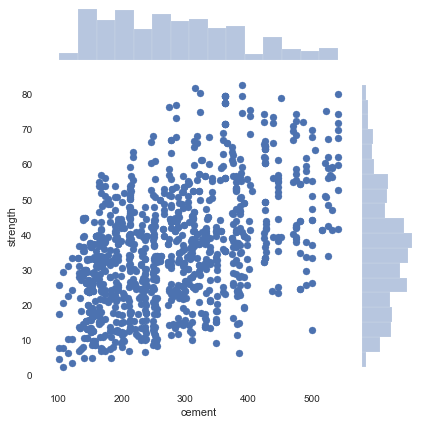

<Figure size 864x288 with 0 Axes>

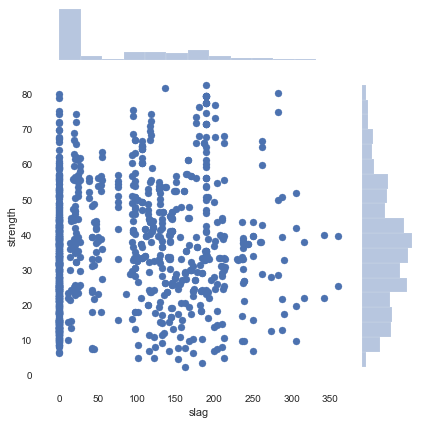

<Figure size 864x288 with 0 Axes>

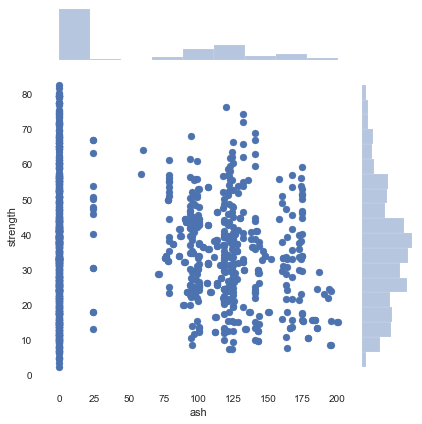

<Figure size 864x288 with 0 Axes>

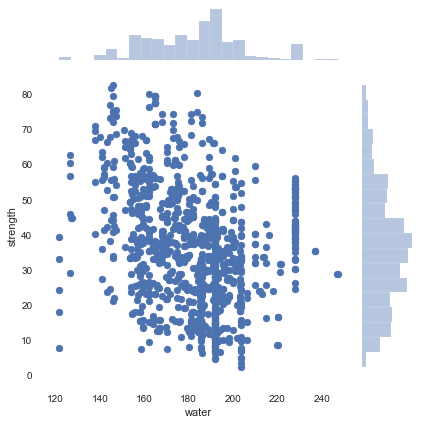

<Figure size 864x288 with 0 Axes>

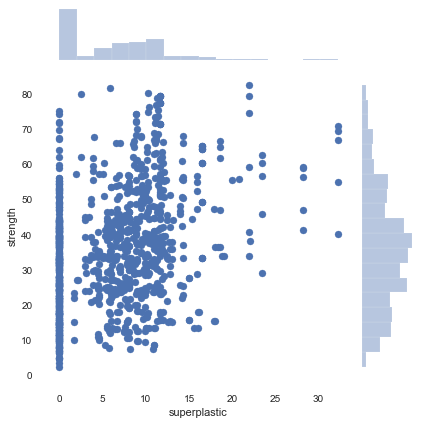

<Figure size 864x288 with 0 Axes>

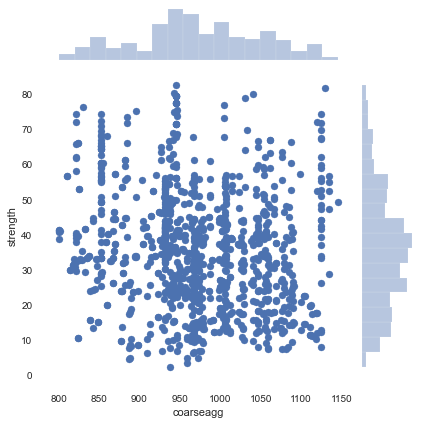

<Figure size 864x288 with 0 Axes>

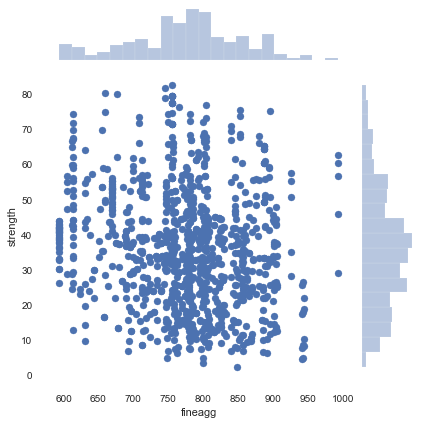

<Figure size 864x288 with 0 Axes>

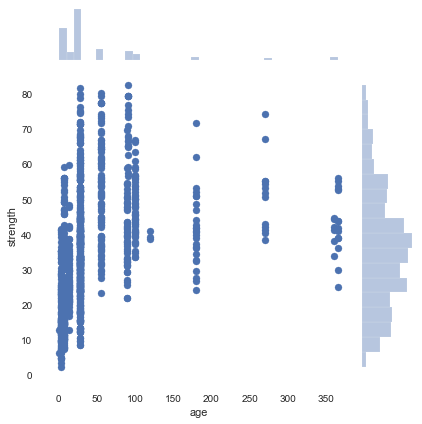

In [31]:
# To plot relationship between the predictor variables and the target column
for i in list(['cement','slag','ash','water','superplastic','coarseagg','fineagg','age']):   
    plt.figure(figsize=(12,4))
    sns.jointplot(x = i, y='strength', data = df)
    plt.show()


Cement seems to have a positive linear relationship with the target column (strength).  

Other predictor variables have weak relationship with the target column (strength).
    

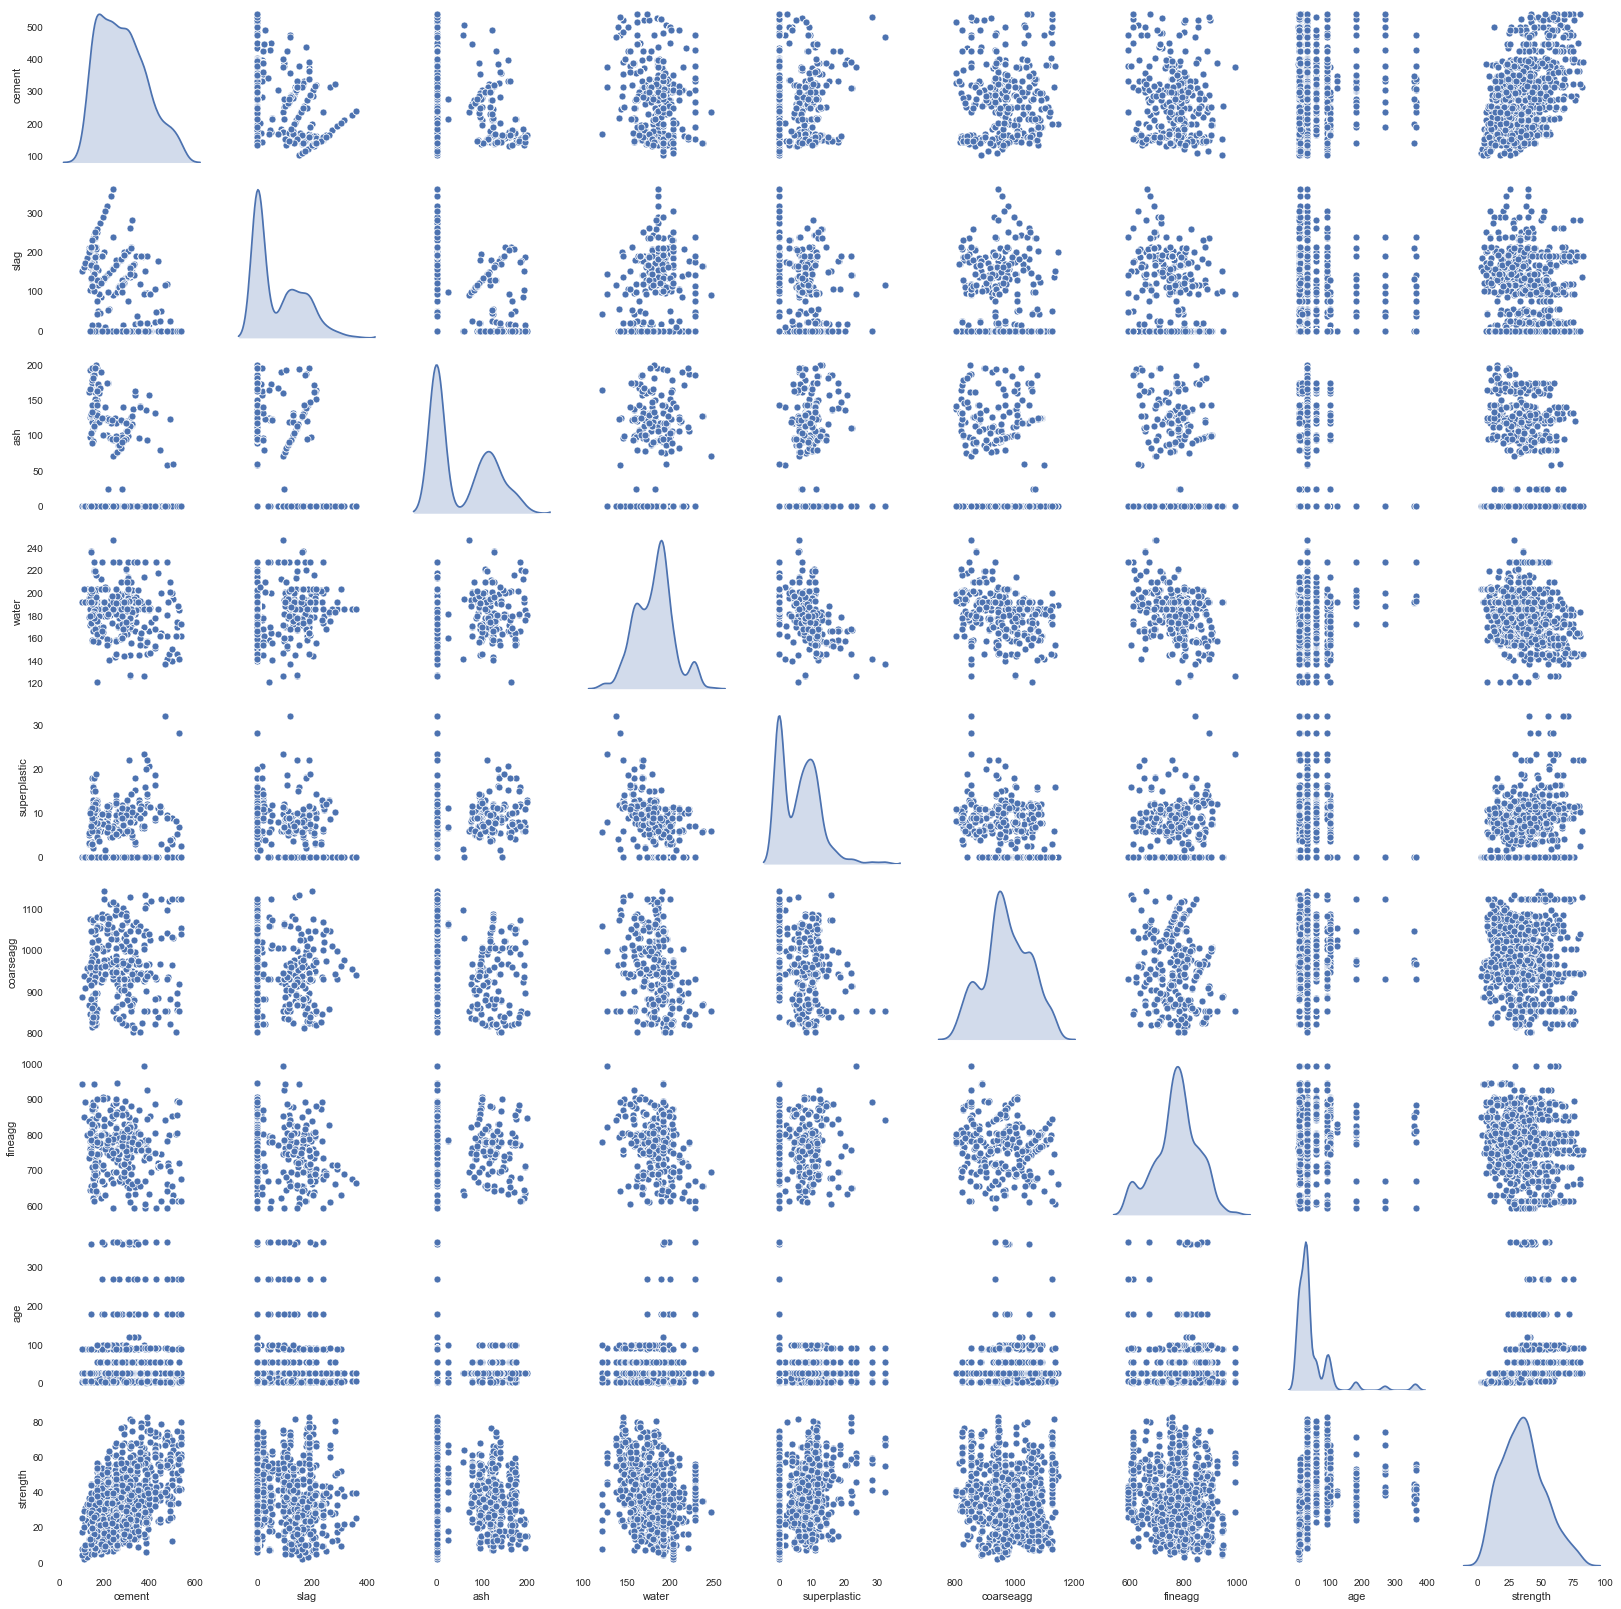

In [32]:
sns.pairplot(df, diag_kind = 'kde')

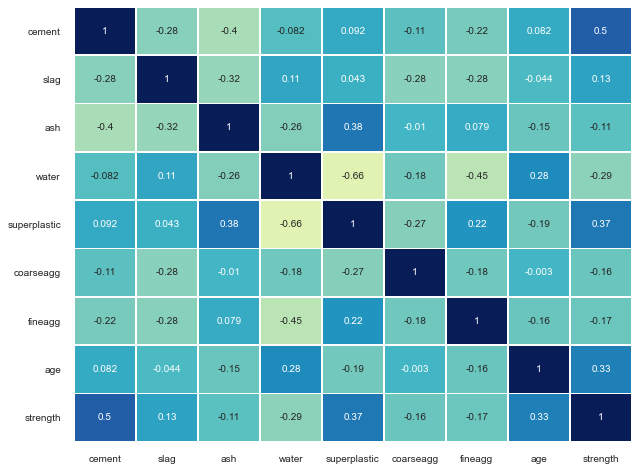

In [33]:
plt.figure(figsize=(10,8))

sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

There is a medium correlation between the cement variable and the target strength column. 

There is a medium negative correlation between superplastic and water predictor variables. 

No visible relationship/correlation among other attributes. 

## Feature Engineering Techniques (10 marks)

### Create New Features from Existing Features

In [34]:
# We can create a new feature called Aggregate Packing which is the ratio of Coarse aggegate to Fine aggregate
df['aggpack']=df.fineagg/df.coarseagg
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,aggpack
0,141.30,212.00,0.00,203.50,0.00,971.80,748.50,28,29.89,0.77
1,168.90,42.20,124.30,158.30,10.80,"1,080.80",796.20,14,23.51,0.74
2,250.00,0.00,95.70,187.40,5.50,956.90,861.20,28,29.22,0.90
3,266.00,114.00,0.00,228.00,0.00,932.00,670.00,28,45.85,0.72
4,154.80,183.40,0.00,193.30,9.10,"1,047.40",696.70,28,18.29,0.67


New Feature called Aggregate Packing (aggpack), which is the ratio of fine aggregate to coarse aggregate, has been created. 

Thus the fine aggregate and coarse aggregate predictor variables would be dropped.



### Get Data Model Ready and do a train test split in ratio of 70:30

In [35]:
#Define X and Y variables 
X = df.drop(columns=['coarseagg','fineagg','strength'])
y = df[['strength']]


#Splitting data into training and test data set in 70:30 respectively 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1)


### Decide on Complexity of model in terms of features

In [36]:
# invoke the LinearRegression function and find the bestfit model on training data
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cement is 0.10366018753705435
The coefficient for slag is 0.08101669448278882
The coefficient for ash is 0.05971055663849475
The coefficient for water is -0.2056136656838953
The coefficient for superplastic is 0.30935525013173104
The coefficient for age is 0.10898611733989882
The coefficient for aggpack is 4.206845973209059


In [37]:
# check the Linear Regression R2 score on Train and Test data 
reg_score1 = regression_model.score(X_train, y_train)
reg_score2 = regression_model.score(X_test, y_test)

print(f'Number of features used = {len(X_train.columns)}')
print(f'Linear Regression Model R2 Score on train data = {reg_score1}')
print(f'Linear Regression Model R2 Score on test data = {reg_score2}')

Number of features used = 7
Linear Regression Model R2 Score on train data = 0.5991483585254107
Linear Regression Model R2 Score on test data = 0.6386742870811546


In [38]:
#creating a regularized lasso model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

# Observe, many of the coefficients have become 0 indicating drop of those dimensions from the model

Lasso model: [ 0.10204949  0.0795577   0.05707709 -0.20608636  0.34416686  0.10858591
  0.        ]


In [39]:
# check the Lasso Model R2 score on Train and Test data 
lasso_score1 = lasso.score(X_train, y_train)
lasso_score2 = lasso.score(X_test, y_test)
print(f'Lasso Model R2 Score on train data = {lasso_score1}')
print(f'Lasso Model R2 Score on test data = {lasso_score2}')

Lasso Model R2 Score on train data = 0.5984745637286442
Lasso Model R2 Score on test data = 0.6432118905653936


In [40]:
# Creating Polynomial features
poly = PolynomialFeatures(degree = 2, interaction_only=True)
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(721, 29)

In [41]:
# Fit simple non regularized model on Polynomial features to get bestfit model on training data
regression_model.fit(X_train, y_train)
print(regression_model.coef_[0])


[ 4.31036596e-10  3.09245864e-01  6.77079080e-03  1.57724335e-01
  4.17328097e-01  5.27890793e+00 -7.57655621e-02 -5.52181399e+01
  1.37193895e-04  1.90943815e-04 -1.45186987e-03 -6.84589827e-03
  3.67840984e-04  8.95370715e-02  3.20186061e-04 -7.17444834e-04
 -4.41022077e-03  7.25845447e-04  1.94959151e-01 -1.92906287e-03
 -1.39754236e-02  1.67084077e-03  2.49248243e-01  8.10529324e-04
 -8.92445462e-04  8.17767956e-02  5.87047911e-03 -2.55844753e+00
  2.44188503e-01]


In [42]:
poly_score1 = regression_model.score(X_train, y_train)
poly_score2 = regression_model.score(X_test, y_test)
print(f'Number of features used = {len(X_train[1])}')
print(f'Polynomial Regression Model R2 Score on train data = {poly_score1}')
print(f'Polynomial Regression Model R2 Score on test data = {poly_score2}')

Number of features used = 29
Polynomial Regression Model R2 Score on train data = 0.7425699471365905
Polynomial Regression Model R2 Score on test data = 0.7426695447343092


In [43]:
#creating a regularized lasso model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))


Lasso model: [ 0.00000000e+00  2.35008741e-01 -2.42000138e-02  1.08956663e-01
  3.18931703e-01  2.06410122e+00 -0.00000000e+00 -0.00000000e+00
  1.14537796e-04  1.79687226e-04 -9.35332039e-04 -4.62074313e-03
  2.59712036e-04  5.31413050e-02  2.65428914e-04 -3.54524542e-04
 -2.37346677e-03  6.34868793e-04  1.47230806e-01 -1.41714566e-03
 -1.06939754e-02  1.48876222e-03  1.78396397e-01  1.02101652e-02
 -7.79633015e-04 -1.40503703e-01  7.67861888e-03 -1.87416152e+00
  1.67749304e-01]


In [44]:
# check the Lasso Model R2 score on Train and Test data 
lasso_score1 = lasso.score(X_train, y_train)
lasso_score2 = lasso.score(X_test, y_test)
print(f'Lasso Model R2 Score on train data = {lasso_score1}')
print(f'Lasso Model R2 Score on test data = {lasso_score2}')

Lasso Model R2 Score on train data = 0.7393983316474617
Lasso Model R2 Score on test data = 0.7355044468821414


A Polynomial model gave a higher R2 score although this is done be creating additional 22 features to the existing 7 features.

Using a Lasso model, reduces the features from 29 to 26 and produces a similar R2 Score.

However, it is safer to leave the number of features as 7 to avoid the curse of dimensionality and try other tecniques like Ensemble methods in creating the model.


## Creating the Model and tuning it

### Building Ensemble Models – Random Forest, Bagging and Boosting


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1)
print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (721, 7) (721, 1)
Testing dataset shape: (309, 7) (309, 1)


Random Forest 

In [46]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train, y_train)

rf_score = rf.score(X_test, y_test)

print(f'Random Forest R2 score = {rf_score}')

Random Forest R2 score = 0.9076013103539509


In [47]:
rf.fit(X_train, y_train)

pd.Series(rf.feature_importances_, X_train.columns ).sort_values(ascending= False)

age            0.35
cement         0.34
water          0.12
slag           0.08
superplastic   0.06
aggpack        0.04
ash            0.02
dtype: float64

In [48]:
from sklearn.ensemble import BaggingRegressor

bg = BaggingRegressor()

bg.fit(X_train, y_train)

bg_score = bg.score(X_test, y_test)

print(f'Bagging R2 score = {bg_score}')

Bagging R2 score = 0.8917946981100373


Gradient Boosting

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()

gb.fit(X_train, y_train)

gb_score = gb.score(X_test, y_test)

print(f'Gradient Boosting R2 score = {gb_score}')

Gradient Boosting R2 score = 0.8969415788970488


### Model Performance Evaluation using Kfold Cross Validation


Random Forest

In [50]:
# KFold Cross Validation for Random Forest
num_folds = 12
seed = 42

kfold = KFold(n_splits=num_folds, random_state=seed)

results = cross_val_score(rf,X, y, cv=kfold, scoring='r2')
rmse = cross_val_score(rf,X, y, cv=kfold, scoring='neg_root_mean_squared_error')

# Model Metrics
rf_minscore = results.mean() - 2*results.std()
rf_maxscore = results.mean() + 2*results.std()
rf_meanscore = results.mean()
rf_rmse = rmse.mean()

print(results)
print("Mean R2 Score (std): %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))


[0.8484296  0.91829759 0.93253401 0.93376962 0.91413253 0.85416891
 0.93797911 0.9320277  0.92254526 0.90653259 0.93792739 0.93498365]
Mean R2 Score (std): 91.444% (2.982%)


Bagging 

In [51]:
# KFold Cross Validation for Bagging

num_folds = 12
seed = 42

kfold = KFold(n_splits=num_folds, random_state=seed)

results = cross_val_score(bg,X, y, cv=kfold, scoring='r2')
rmse = cross_val_score(bg,X, y, cv=kfold, scoring='neg_root_mean_squared_error')

# Model Metrics
bg_minscore = results.mean() - 2*results.std()
bg_maxscore = results.mean() + 2*results.std()
bg_meanscore = results.mean()
bg_rmse = rmse.mean()

print(results)
print("Mean R2 Score (std): %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.83453593 0.92045591 0.9139535  0.92236974 0.91327485 0.83581115
 0.92979903 0.91217367 0.90808739 0.89021124 0.93061582 0.91539731]
Mean R2 Score (std): 90.222% (3.163%)


Gradient Boosting

In [52]:
# KFold Cross Validation for Gradient Boosting

num_folds = 12
seed = 42

kfold = KFold(n_splits=num_folds, random_state=seed)

results = cross_val_score(gb,X, y, cv=kfold, scoring='r2')
rmse = cross_val_score(gb,X, y, cv=kfold, scoring='neg_root_mean_squared_error')

gb_minscore = results.mean() - 2*results.std()
gb_maxscore = results.mean() + 2*results.std()
gb_meanscore = results.mean()
gb_rmse = rmse.mean()

print(results)
print("Mean R2 Score (std): %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.87515375 0.89950403 0.92414197 0.88664173 0.9104732  0.84532968
 0.92501781 0.92151683 0.92511087 0.89581181 0.91880641 0.91721967]
Mean R2 Score (std): 90.373% (2.363%)


Dataframe for Model Comparison w.r.t their metrics

In [53]:
#Store the R2 score results for each model in a dataframe for final comparison
Summary_Df = pd.DataFrame({'Method':['Random Forest','Bagging','Gradient Boost'], 'Minimum R2 Score': [rf_minscore, bg_minscore, gb_minscore],'Mean R2 Score':[rf_meanscore,bg_meanscore,gb_meanscore],'Maximum R2 Score':[rf_maxscore,bg_maxscore,gb_maxscore],'Root Mean Squared Error':[rf_rmse,bg_rmse,gb_rmse] })
Summary_Df = Summary_Df[['Method', 'Minimum R2 Score','Mean R2 Score','Maximum R2 Score','Root Mean Squared Error']]
Summary_Df

,Method,Minimum R2 Score,Mean R2 Score,Maximum R2 Score,Root Mean Squared Error
0,Random Forest,0.85,0.91,0.97,-4.71
1,Bagging,0.84,0.90,0.97,-5.09
2,Gradient Boost,0.86,0.90,0.95,-5.07


### Model Hyper Parameter Tuning using Grid Search

In [54]:
from sklearn.model_selection import GridSearchCV

parameters = {'bootstrap': [True],
 'max_depth': [10, 20, 30, 40, 50],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 8],
 'n_estimators': [100, 150, 200]}


grid = GridSearchCV(RandomForestRegressor(), parameters, cv = 10, verbose = 2, n_jobs= 4)
grid.fit(X, y)

grid.best_params_

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    4.8s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   13.6s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   28.2s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:   47.7s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 1200 out of 1200 | elapsed:  1.4min finished


{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 150}

In [55]:
rft = RandomForestRegressor(bootstrap= True,
 max_depth= 30,
 max_features= 'auto',
 min_samples_leaf= 1,
 n_estimators= 150)

results = cross_val_score(rft, X, y, cv = 10, scoring = 'r2')
rmse = cross_val_score(rft, X, y, cv = 10, scoring = 'neg_root_mean_squared_error')

rft_minscore = results.mean() - 2*results.std()
rft_maxscore = results.mean() + 2*results.std()
rft_meanscore = results.mean()
rft_rmse = rmse.mean()

print(results)
print("Mean R2 Score (std): %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.88378784 0.89971338 0.95531581 0.91464263 0.88249543 0.93166709
 0.93956403 0.91935621 0.92687691 0.92657993]
Mean R2 Score (std): 91.800% (2.231%)


In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

parameters = {'bootstrap': [True],
 'warm_start': ['True', 'False'],
 'max_features': [2,4,6,8,10],
 'base_estimator':[SVR(),DecisionTreeRegressor()],
 'n_estimators':[100,150,200]}


grid = GridSearchCV(BaggingRegressor(),parameters, cv = 10, verbose = 2, n_jobs=4)
grid.fit(X, y)

grid.best_params_

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   14.9s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:  1.9min finished


{'base_estimator': DecisionTreeRegressor(),
 'bootstrap': True,
 'max_features': 6,
 'n_estimators': 200,
 'warm_start': 'False'}

In [59]:
bgt = BaggingRegressor(base_estimator = DecisionTreeRegressor(),
 bootstrap= True,
 max_features= 6,
 n_estimators= 200,
 warm_start = True)


results = cross_val_score(bgt, X, y, cv = 10, scoring = 'r2')
rmse = cross_val_score(bgt, X, y, cv = 10, scoring = 'neg_root_mean_squared_error')

bgt_minscore = results.mean() - 2*results.std()
bgt_maxscore = results.mean() + 2*results.std()
bgt_meanscore = results.mean()
bgt_rmse = rmse.mean()

print(results)
print("Mean R2 Score (std): %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
    

[0.90707761 0.89480995 0.94499358 0.90023142 0.86689556 0.91514451
 0.91230217 0.91407477 0.90260427 0.91702118]
Mean R2 Score (std): 90.752% (1.873%)


Dataframe for Tuned Model Comparison

In [60]:
#Store the R2 score results for each model in a dataframe for final comparison
pd.options.display.float_format = '{:,.4f}'.format
Summary_Df = pd.DataFrame({'Method':['Random Forest','Tuned Random Forest','Bagging','Tuned Bagging'], 'Minimum R2 Score': [rf_minscore, rft_minscore, bg_minscore, bgt_minscore],'Mean R2 Score':[rf_meanscore,rft_meanscore,bg_meanscore,bgt_meanscore],'Maximum R2 Score':[rf_maxscore,rft_maxscore, bg_maxscore,bgt_maxscore],'Root Mean Squared Error':[rf_rmse,rft_rmse,bg_rmse,bgt_rmse] })
Summary_Df = Summary_Df[['Method', 'Minimum R2 Score','Mean R2 Score','Maximum R2 Score','Root Mean Squared Error']]
Summary_Df

,Method,Minimum R2 Score,Mean R2 Score,Maximum R2 Score,Root Mean Squared Error
0,Random Forest,0.8548,0.9144,0.9741,-4.7097
1,Tuned Random Forest,0.8734,0.9180,0.9626,-4.6623
2,Bagging,0.8390,0.9022,0.9655,-5.0933
3,Tuned Bagging,0.8701,0.9075,0.9450,-4.8924


### Conclusion
We have been able to perform Exploratory Data Analysis on Data for Concrete Mixing. 
We created a new feature called Aggregate packing using existing features (Coarse Aggregate and Fine Aggregate). 
We created 3 models for predicting the Concrete strength with model R2 Score range of 83% to 97% and root mean squared error less than or equal to 5.